#  Import the necessary libraries

In [324]:
!pip install python-binance pandas mplfinance --quiet

# Import Libraries
from binance import Client, ThreadedWebsocketManager, ThreadedDepthCacheManager

# Visualization libraries
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf

%matplotlib inline

#  Initialize the client
Pass your API Key and Secret

In [325]:
apikey = 'API KEY'
secret = '`SECRET CODE'
client = Client(apikey, secret)

# get all symbol prices

prices = client.get_all_tickers()
prices[2]['price']


'0.01336800'

#  Storing all Prices in a Dataframe

In [326]:
all_cryptocurrency_df = pd.DataFrame(prices)
all_cryptocurrency_df.head(5)

,symbol,price
0,ETHBTC,0.06893900
1,LTCBTC,0.00385100
2,BNBBTC,0.01336800
3,NEOBTC,0.00036100
4,QTUMETH,0.00169300


In [327]:
all_cryptocurrency_df.shape

(2144, 2)

In [328]:
all_cryptocurrency_df['symbol'].unique()

array(['ETHBTC', 'LTCBTC', 'BNBBTC', ..., 'RPLUSDT', 'PROSUSDT', 'FETTRY'],
      dtype=object)

In [329]:
all_cryptocurrency_df.set_index('symbol', inplace = True)
all_cryptocurrency_df

,price
symbol,
ETHBTC,0.06893900
LTCBTC,0.00385100
BNBBTC,0.01336800
NEOBTC,0.00036100
QTUMETH,0.00169300
...,...
RPLBTC,0.00169400
RPLBUSD,39.03000000
RPLUSDT,38.90000000


In [330]:
all_cryptocurrency_df.dtypes

price    object
dtype: object

#  Change the Price from "Object" to numeric value

In [331]:
all_cryptocurrency_df['price'] = pd.to_numeric(all_cryptocurrency_df['price'])
all_cryptocurrency_df.dtypes

price    float64
dtype: object

In [332]:
all_cryptocurrency_df.describe()

,price
count,2.144000e+03
mean,5.359638e+05
std,1.678423e+07
min,1.000000e-08
25%,2.860000e-04
50%,5.039000e-02
75%,1.963525e+00
max,6.938912e+08


#  Get Market Depth

In [333]:
#Get Market Depth data for BNBBTC
DOM = client.get_order_book(symbol='BNBBTC')
DOM

{'lastUpdateId': 2958364596,
 'bids': [['0.01336800', '7.03600000'],
  ['0.01336700', '4.11300000'],
  ['0.01336600', '3.03500000'],
  ['0.01336500', '0.14000000'],
  ['0.01336400', '3.44400000'],
  ['0.01336300', '9.42300000'],
  ['0.01336200', '10.46900000'],
  ['0.01336100', '1.81500000'],
  ['0.01336000', '5.09000000'],
  ['0.01335900', '0.09000000'],
  ['0.01335800', '0.09000000'],
  ['0.01335700', '0.83800000'],
  ['0.01335600', '8.07900000'],
  ['0.01335500', '6.45600000'],
  ['0.01335400', '1.33600000'],
  ['0.01335300', '1.01200000'],
  ['0.01335200', '0.74900000'],
  ['0.01335100', '12.55400000'],
  ['0.01335000', '4.55800000'],
  ['0.01334900', '1.51800000'],
  ['0.01334800', '54.76100000'],
  ['0.01334700', '1.47400000'],
  ['0.01334600', '0.28400000'],
  ['0.01334500', '6.99300000'],
  ['0.01334400', '4.94100000'],
  ['0.01334300', '0.38500000'],
  ['0.01334200', '0.10400000'],
  ['0.01334100', '0.60000000'],
  ['0.01334000', '10.29900000'],
  ['0.01333900', '15.66200000']

In [334]:
DOM_df = pd.DataFrame(DOM['bids'])
DOM_df.columns = ['Price','Volume']
DOM_df.head(6)

,Price,Volume
0,0.01336800,7.03600000
1,0.01336700,4.11300000
2,0.01336600,3.03500000
3,0.01336500,0.14000000
4,0.01336400,3.44400000
5,0.01336300,9.42300000


#  Recent Trades for BNBBTC

In [335]:
#BNBBTC Recent Trade
Rec_trades = client.get_recent_trades(symbol='BNBBTC')
Rec_trades

[{'id': 214805566,
  'price': '0.01338900',
  'qty': '0.09000000',
  'quoteQty': '0.00120501',
  'time': 1674903118909,
  'isBuyerMaker': True,
  'isBestMatch': True},
 {'id': 214805567,
  'price': '0.01338900',
  'qty': '0.03900000',
  'quoteQty': '0.00052217',
  'time': 1674903118909,
  'isBuyerMaker': True,
  'isBestMatch': True},
 {'id': 214805568,
  'price': '0.01339000',
  'qty': '0.03900000',
  'quoteQty': '0.00052221',
  'time': 1674903122834,
  'isBuyerMaker': False,
  'isBestMatch': True},
 {'id': 214805569,
  'price': '0.01339000',
  'qty': '0.33800000',
  'quoteQty': '0.00452582',
  'time': 1674903131410,
  'isBuyerMaker': False,
  'isBestMatch': True},
 {'id': 214805570,
  'price': '0.01338900',
  'qty': '0.25000000',
  'quoteQty': '0.00334725',
  'time': 1674903131601,
  'isBuyerMaker': True,
  'isBestMatch': True},
 {'id': 214805571,
  'price': '0.01338900',
  'qty': '2.77000000',
  'quoteQty': '0.03708753',
  'time': 1674903131601,
  'isBuyerMaker': True,
  'isBestMatch

In [336]:
Rec_trades_df = pd.DataFrame(Rec_trades)
Rec_trades_df.head(5)

,id,price,qty,quoteQty,time,isBuyerMaker,isBestMatch
0,214805566,0.01338900,0.09000000,0.00120501,1674903118909,True,True
1,214805567,0.01338900,0.03900000,0.00052217,1674903118909,True,True
2,214805568,0.01339000,0.03900000,0.00052221,1674903122834,False,True
3,214805569,0.01339000,0.33800000,0.00452582,1674903131410,False,True
4,214805570,0.01338900,0.25000000,0.00334725,1674903131601,True,True


In [337]:
Rec_trades_df.set_index('id',inplace= True)
Rec_trades_df

,price,qty,quoteQty,time,isBuyerMaker,isBestMatch
id,,,,,,
214805566,0.01338900,0.09000000,0.00120501,1674903118909,True,True
214805567,0.01338900,0.03900000,0.00052217,1674903118909,True,True
214805568,0.01339000,0.03900000,0.00052221,1674903122834,False,True
214805569,0.01339000,0.33800000,0.00452582,1674903131410,False,True
214805570,0.01338900,0.25000000,0.00334725,1674903131601,True,True
...,...,...,...,...,...,...
214806061,0.01336700,0.09000000,0.00120303,1674903805942,False,True
214806062,0.01336800,1.01200000,0.01352841,1674903806099,False,True
214806063,0.01336800,0.08500000,0.00113628,1674903806099,False,True


# Change the date time format

In [338]:
#Change datetime format
Rec_trades_df['time'] = pd.to_datetime(Rec_trades_df['time']).dt.strftime('%m/%d/%Y')
Rec_trades_df

,price,qty,quoteQty,time,isBuyerMaker,isBestMatch
id,,,,,,
214805566,0.01338900,0.09000000,0.00120501,01/01/1970,True,True
214805567,0.01338900,0.03900000,0.00052217,01/01/1970,True,True
214805568,0.01339000,0.03900000,0.00052221,01/01/1970,False,True
214805569,0.01339000,0.33800000,0.00452582,01/01/1970,False,True
214805570,0.01338900,0.25000000,0.00334725,01/01/1970,True,True
...,...,...,...,...,...,...
214806061,0.01336700,0.09000000,0.00120303,01/01/1970,False,True
214806062,0.01336800,1.01200000,0.01352841,01/01/1970,False,True
214806063,0.01336800,0.08500000,0.00113628,01/01/1970,False,True


In [339]:
#  [
#   [
#     1499040000000,      // Open time
#     "0.01634790",       // Open
#     "0.80000000",       // High
#     "0.01575800",       // Low
#     "0.01577100",       // Close
#     "148976.11427815",  // Volume
#     1499644799999,      // Close time
#     "2434.19055334",    // Quote asset volume
#     308,                // Number of trades
#     "1756.87402397",    // Taker buy base asset volume
#     "28.46694368",      // Taker buy quote asset volume
#     "17928899.62484339" // Ignore.
#   ]
# ]

## Fetch 1 min Candlesticks/Klines for lastday for ETHUSDT

In [340]:
## fetch 1 minute klines for the last day up until now for ETHUSDT
lastday_klines_1 = client.get_historical_klines("ETHUSDT", Client.KLINE_INTERVAL_1MINUTE, "1 day ago UTC")
lastday_klines_1

[[1674817380000,
  '1577.31000000',
  '1577.31000000',
  '1576.79000000',
  '1576.79000000',
  '163.44300000',
  1674817439999,
  '257782.78616300',
  317,
  '57.99850000',
  '91471.77868500',
  '0'],
 [1674817440000,
  '1576.79000000',
  '1577.51000000',
  '1576.79000000',
  '1577.50000000',
  '145.36550000',
  1674817499999,
  '229270.28600800',
  252,
  '122.10120000',
  '192577.51670900',
  '0'],
 [1674817500000,
  '1577.51000000',
  '1577.56000000',
  '1577.50000000',
  '1577.56000000',
  '66.79480000',
  1674817559999,
  '105370.83808300',
  212,
  '56.87210000',
  '89717.58670800',
  '0'],
 [1674817560000,
  '1577.55000000',
  '1577.68000000',
  '1577.55000000',
  '1577.56000000',
  '97.15710000',
  1674817619999,
  '153274.89716200',
  214,
  '54.85370000',
  '86536.17424200',
  '0'],
 [1674817620000,
  '1577.56000000',
  '1577.56000000',
  '1577.48000000',
  '1577.49000000',
  '55.90240000',
  1674817679999,
  '88188.04543200',
  160,
  '8.03100000',
  '12669.29623000',
  '0']

In [341]:
lastday_klines_1_df  = pd.DataFrame(lastday_klines_1)
lastday_klines_1_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1674817380000,1577.31000000,1577.31000000,1576.79000000,1576.79000000,163.44300000,1674817439999,257782.78616300,317,57.99850000,91471.77868500,0
1,1674817440000,1576.79000000,1577.51000000,1576.79000000,1577.50000000,145.36550000,1674817499999,229270.28600800,252,122.10120000,192577.51670900,0
2,1674817500000,1577.51000000,1577.56000000,1577.50000000,1577.56000000,66.79480000,1674817559999,105370.83808300,212,56.87210000,89717.58670800,0
3,1674817560000,1577.55000000,1577.68000000,1577.55000000,1577.56000000,97.15710000,1674817619999,153274.89716200,214,54.85370000,86536.17424200,0
4,1674817620000,1577.56000000,1577.56000000,1577.48000000,1577.49000000,55.90240000,1674817679999,88188.04543200,160,8.03100000,12669.29623000,0


# Renaming the columns properly

In [342]:
name_columns = ['Open Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close Time', 'Quote Asset Volume', 
                    'Number of Trades', 'TB Base Volume', 'TB Quote Volume', 'Ignore']
lastday_klines_1_df.columns = name_columns
lastday_klines_1_df.head()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
0,1674817380000,1577.31000000,1577.31000000,1576.79000000,1576.79000000,163.44300000,1674817439999,257782.78616300,317,57.99850000,91471.77868500,0
1,1674817440000,1576.79000000,1577.51000000,1576.79000000,1577.50000000,145.36550000,1674817499999,229270.28600800,252,122.10120000,192577.51670900,0
2,1674817500000,1577.51000000,1577.56000000,1577.50000000,1577.56000000,66.79480000,1674817559999,105370.83808300,212,56.87210000,89717.58670800,0
3,1674817560000,1577.55000000,1577.68000000,1577.55000000,1577.56000000,97.15710000,1674817619999,153274.89716200,214,54.85370000,86536.17424200,0
4,1674817620000,1577.56000000,1577.56000000,1577.48000000,1577.49000000,55.90240000,1674817679999,88188.04543200,160,8.03100000,12669.29623000,0


# Adjusting the 'Open Time' date format & the numeric values

In [343]:
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Quote Asset Volume', 'TB Base Volume', 'TB Quote Volume']
lastday_klines_1_df[numeric_columns] = lastday_klines_1_df[numeric_columns].apply(pd.to_numeric, axis=1)
lastday_klines_1_df['Open Time'] = pd.to_datetime(lastday_klines_1_df['Open Time']/1000, unit='s')
lastday_klines_1_df['Close Time'] = pd.to_datetime(lastday_klines_1_df['Close Time']/1000, unit='s')

lastday_klines_1_df

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
0,2023-01-27 11:03:00,1577.31,1577.31,1576.79,1576.79,163.4430,2023-01-27 11:03:59.999000064,257782.786163,317,57.9985,91471.778685,0
1,2023-01-27 11:04:00,1576.79,1577.51,1576.79,1577.50,145.3655,2023-01-27 11:04:59.999000064,229270.286008,252,122.1012,192577.516709,0
2,2023-01-27 11:05:00,1577.51,1577.56,1577.50,1577.56,66.7948,2023-01-27 11:05:59.999000064,105370.838083,212,56.8721,89717.586708,0
3,2023-01-27 11:06:00,1577.55,1577.68,1577.55,1577.56,97.1571,2023-01-27 11:06:59.999000064,153274.897162,214,54.8537,86536.174242,0
4,2023-01-27 11:07:00,1577.56,1577.56,1577.48,1577.49,55.9024,2023-01-27 11:07:59.999000064,88188.045432,160,8.0310,12669.296230,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1436,2023-01-28 10:59:00,1584.80,1584.93,1584.19,1584.20,279.0355,2023-01-28 10:59:59.999000064,442216.713372,313,63.9007,101265.458032,0
1437,2023-01-28 11:00:00,1584.20,1584.20,1581.86,1583.42,613.3186,2023-01-28 11:00:59.999000064,970884.231205,722,267.2361,423001.035679,0
1438,2023-01-28 11:01:00,1583.42,1584.00,1583.42,1583.99,151.3081,2023-01-28 11:01:59.999000064,239628.078685,359,66.5328,105362.461274,0
1439,2023-01-28 11:02:00,1584.00,1584.18,1583.58,1584.18,154.4723,2023-01-28 11:02:59.999000064,244670.260673,301,66.7773,105766.020165,0


In [344]:
lastday_klines_1_df.dtypes

Open Time             datetime64[ns]
Open                         float64
High                         float64
Low                          float64
Close                        float64
Volume                       float64
Close Time            datetime64[ns]
Quote Asset Volume           float64
Number of Trades               int64
TB Base Volume               float64
TB Quote Volume              float64
Ignore                        object
dtype: object

# Visualizing 1min candlesticks from last day till now 

c:\Users\pearl\anaconda3\lib\site-packages\mplfinance\_arg_validators.py:83: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


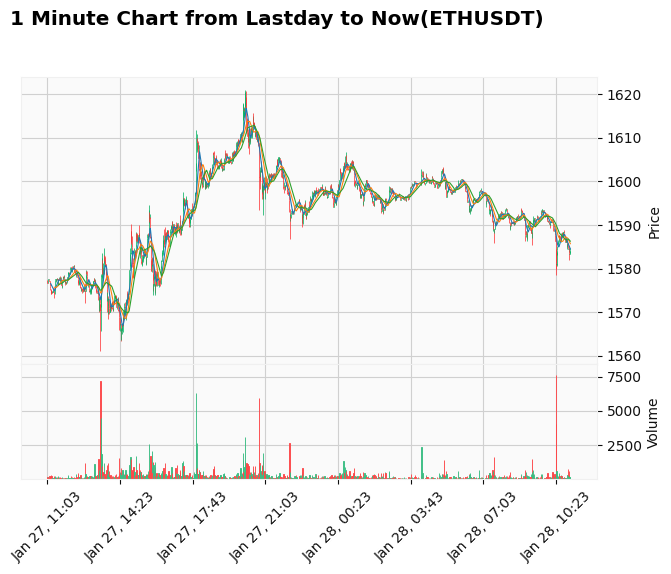

In [345]:
# 1 minute klines from lastday until now 
lastday_klines_1_Viz =lastday_klines_1_df.copy()
mpf.plot(lastday_klines_1_Viz.set_index('Close Time'),
        style='yahoo', 
         title = '1 Minute Chart from Lastday to Now(ETHUSDT)',
        volume=True, 
        mav=(10,20,30));

##  Fetch 4H klines for last month 2021 For ETHBTC

In [346]:
# fetch 30 minute klines for the last month of 2021
lastmonth_2021_klines = client.get_historical_klines("ETHBTC", Client.KLINE_INTERVAL_4HOUR, "1 Dec, 2021", "1 Jan, 2022")
lastmonth_2021_klines_df  = pd.DataFrame(lastmonth_2021_klines)
lastmonth_2021_klines_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1638316800000,0.08129800,0.08325500,0.08106200,0.08297000,25857.50420000,1638331199999,2128.76698654,66873,14108.88820000,1160.96197053,0
1,1638331200000,0.08297100,0.08352000,0.08225300,0.08338300,17464.33280000,1638345599999,1448.57983887,40369,8305.21150000,689.09627199,0
2,1638345600000,0.08339300,0.08348600,0.08166500,0.08175400,17946.63750000,1638359999999,1483.02225883,47991,8861.75110000,732.29922842,0
3,1638360000000,0.08175000,0.08236700,0.08060000,0.08061500,21522.67560000,1638374399999,1752.53819506,52779,12361.75480000,1006.99614993,0
4,1638374400000,0.08061600,0.08118000,0.08023300,0.08115100,13688.82940000,1638388799999,1104.41910456,35899,6213.60230000,501.26570965,0


In [347]:
lastmonth_2021_klines_df.columns = name_columns
lastmonth_2021_klines_df.head()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
0,1638316800000,0.08129800,0.08325500,0.08106200,0.08297000,25857.50420000,1638331199999,2128.76698654,66873,14108.88820000,1160.96197053,0
1,1638331200000,0.08297100,0.08352000,0.08225300,0.08338300,17464.33280000,1638345599999,1448.57983887,40369,8305.21150000,689.09627199,0
2,1638345600000,0.08339300,0.08348600,0.08166500,0.08175400,17946.63750000,1638359999999,1483.02225883,47991,8861.75110000,732.29922842,0
3,1638360000000,0.08175000,0.08236700,0.08060000,0.08061500,21522.67560000,1638374399999,1752.53819506,52779,12361.75480000,1006.99614993,0
4,1638374400000,0.08061600,0.08118000,0.08023300,0.08115100,13688.82940000,1638388799999,1104.41910456,35899,6213.60230000,501.26570965,0


#  Adjusting the 'Open Time' date format 

In [348]:
lastmonth_2021_klines_df['Open Time'] = pd.to_datetime(lastmonth_2021_klines_df['Open Time']/1000, unit='s')
lastmonth_2021_klines_df['Close Time'] = pd.to_datetime(lastmonth_2021_klines_df['Close Time']/1000, unit='s')
lastmonth_2021_klines_df[numeric_columns] = lastmonth_2021_klines_df[numeric_columns].apply(pd.to_numeric, axis=1)
lastmonth_2021_klines_df.head()


,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
0,2021-12-01 00:00:00,0.081298,0.083255,0.081062,0.082970,25857.5042,2021-12-01 03:59:59.999000064,2128.766987,66873,14108.8882,1160.961971,0
1,2021-12-01 04:00:00,0.082971,0.083520,0.082253,0.083383,17464.3328,2021-12-01 07:59:59.999000064,1448.579839,40369,8305.2115,689.096272,0
2,2021-12-01 08:00:00,0.083393,0.083486,0.081665,0.081754,17946.6375,2021-12-01 11:59:59.999000064,1483.022259,47991,8861.7511,732.299228,0
3,2021-12-01 12:00:00,0.081750,0.082367,0.080600,0.080615,21522.6756,2021-12-01 15:59:59.999000064,1752.538195,52779,12361.7548,1006.996150,0
4,2021-12-01 16:00:00,0.080616,0.081180,0.080233,0.081151,13688.8294,2021-12-01 19:59:59.999000064,1104.419105,35899,6213.6023,501.265710,0


# Visualization

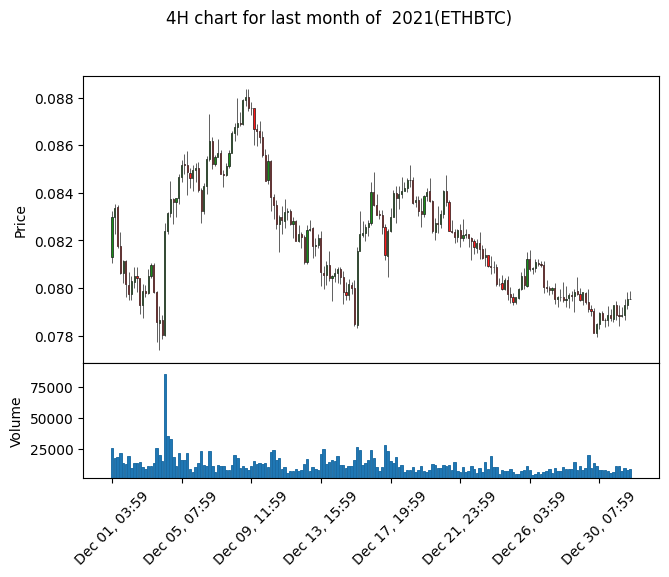

In [349]:
# 4H klines for last month of  2021
show_lastmonth_2021_df_100 = lastmonth_2021_klines_df.set_index('Close Time').tail(250)
mc = mpf.make_marketcolors(up='g',down='r')
s  = mpf.make_mpf_style(marketcolors=mc)
mpf.plot(show_lastmonth_2021_df_100,
        type = 'candle',
         style = s,
         title = '4H chart for last month of  2021(ETHBTC)',
        volume=True
        )

## Fetch daily klines for 2022 For BTCUSDT

In [350]:
# fetch 1 day klines for the previous month (Febuary) of 2022
daily_2022_klines = client.get_historical_klines("BTCUSDT", Client.KLINE_INTERVAL_1DAY, "1 Jan 2022")
daily_2022_klines_df  = pd.DataFrame(daily_2022_klines)
daily_2022_klines_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1640995200000,46216.93000000,47954.63000000,46208.37000000,47722.65000000,19604.46325000,1641081599999,924155159.58348650,714899,9942.36679000,468738711.79010650,0
1,1641081600000,47722.66000000,47990.00000000,46654.00000000,47286.18000000,18340.46040000,1641167999999,866610995.56335820,709624,9166.46954000,433182392.28194660,0
2,1641168000000,47286.18000000,47570.00000000,45696.00000000,46446.10000000,27662.07710000,1641254399999,1292203508.32565490,885624,13524.76045000,631879430.11428000,0
3,1641254400000,46446.10000000,47557.54000000,45500.00000000,45832.01000000,35491.41360000,1641340799999,1649170424.12761340,1021815,17689.26808000,821725463.08080750,0
4,1641340800000,45832.01000000,47070.00000000,42500.00000000,43451.13000000,51784.11857000,1641427199999,2334288544.64544840,1478532,23552.99460000,1063287226.35714140,0


In [351]:
daily_2022_klines_df.columns = name_columns
daily_2022_klines_df.tail()


,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
388,1674518400000,22917.81000000,23162.20000000,22462.93000000,22632.89000000,293158.78254000,1674604799999,6721432962.57384140,7395584,144239.84356000,3307407342.13857970,0
389,1674604800000,22631.94000000,23816.73000000,22300.00000000,23060.94000000,346042.83223000,1674691199999,7875590359.11583720,8060446,172647.90115000,3929821773.96511740,0
390,1674691200000,23060.42000000,23282.47000000,22850.01000000,23009.65000000,288924.43581000,1674777599999,6664592468.33792820,7181086,143185.08341000,3303064271.05117470,0
391,1674777600000,23009.65000000,23500.00000000,22534.88000000,23074.16000000,280833.86315000,1674863999999,6461707755.05391510,7079096,139699.27638000,3214623770.84504020,0
392,1674864000000,23074.16000000,23189.00000000,22905.00000000,22986.29000000,69395.86087000,1674950399999,1599622396.39431940,2043137,34597.40548000,797529752.28198630,0


In [352]:
daily_2022_klines_df['Open Time'] = pd.to_datetime(daily_2022_klines_df['Open Time']/1000, unit='s')
daily_2022_klines_df['Close Time'] = pd.to_datetime(daily_2022_klines_df['Close Time']/1000, unit='s')
daily_2022_klines_df[numeric_columns] = daily_2022_klines_df[numeric_columns].apply(pd.to_numeric, axis=1)
daily_2022_klines_df.head()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
0,2022-01-01,46216.93,47954.63,46208.37,47722.65,19604.46325,2022-01-01 23:59:59.999000064,9.241552e+08,714899,9942.36679,4.687387e+08,0
1,2022-01-02,47722.66,47990.00,46654.00,47286.18,18340.46040,2022-01-02 23:59:59.999000064,8.666110e+08,709624,9166.46954,4.331824e+08,0
2,2022-01-03,47286.18,47570.00,45696.00,46446.10,27662.07710,2022-01-03 23:59:59.999000064,1.292204e+09,885624,13524.76045,6.318794e+08,0
3,2022-01-04,46446.10,47557.54,45500.00,45832.01,35491.41360,2022-01-04 23:59:59.999000064,1.649170e+09,1021815,17689.26808,8.217255e+08,0
4,2022-01-05,45832.01,47070.00,42500.00,43451.13,51784.11857,2022-01-05 23:59:59.999000064,2.334289e+09,1478532,23552.99460,1.063287e+09,0


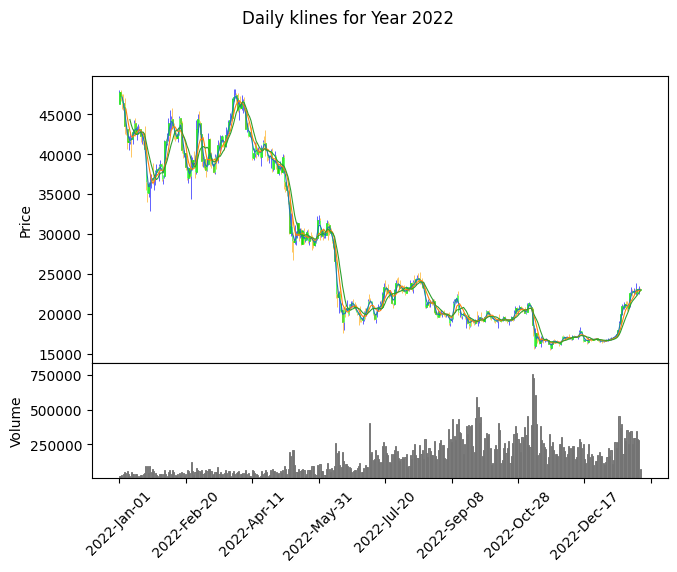

In [353]:
# 1 day  klines for daily of 2022
mc = mpf.make_marketcolors(up='g',down='r',
                           edge='lime',
                           wick={'up':'blue','down':'orange'},
                           volume='gray',
                           ohlc='black')
s  = mpf.make_mpf_style(marketcolors=mc)
mpf.plot(daily_2022_klines_df.set_index('Close Time'),
        type = 'candle',
         style = s,
         title = 'Daily klines for Year 2022',
         volume=True,
         mav=(3,6,9)
        )


##  Fetch weekly klines for 2022

In [354]:
# fetch 1 weel klines for the previous month (Febuary) of 2022
weekly_2022_klines = client.get_historical_klines("BTCUSDT", Client.KLINE_INTERVAL_1WEEK, "1 Jan 2022")
weekly_2022_klines_df  = pd.DataFrame(weekly_2022_klines)
weekly_2022_klines_df.columns = name_columns
weekly_2022_klines_df.head()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
0,1641168000000,47286.18000000,47570.00000000,40501.00000000,41864.62000000,264331.61587000,1641772799999,11564043206.34263770,7717954,128417.56962000,5617721267.31578220,0
1,1641772800000,41864.62000000,44500.00000000,39650.00000000,43071.66000000,232059.06969000,1642377599999,9875457752.62500370,6758442,114555.79525000,4878281491.66561680,0
2,1642377600000,43071.66000000,43505.00000000,34008.00000000,36244.55000000,354513.98432000,1642982399999,13695568421.72647182,9181325,170960.34714200,6607067308.59797929,0
3,1642982400000,36244.55000000,38919.98000000,32917.17000000,37881.76000000,353702.62639100,1643587199999,12907284440.45525624,8716769,179036.24472800,6536472796.36890226,0
4,1643587200000,37881.75000000,42656.00000000,36250.00000000,42380.87000000,258946.95322000,1644191999999,10064164364.24220800,6785864,131038.94536000,5096829006.54884560,0


In [355]:
weekly_2022_klines_df['Open Time'] = pd.to_datetime(weekly_2022_klines_df['Open Time']/1000, unit='s')
weekly_2022_klines_df['Close Time'] = pd.to_datetime(weekly_2022_klines_df['Close Time']/1000, unit='s')
weekly_2022_klines_df[numeric_columns] = weekly_2022_klines_df[numeric_columns].apply(pd.to_numeric, axis=1)
weekly_2022_klines_df.head()



,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
0,2022-01-03,47286.18,47570.00,40501.00,41864.62,264331.615870,2022-01-09 23:59:59.999000064,1.156404e+10,7717954,128417.569620,5.617721e+09,0
1,2022-01-10,41864.62,44500.00,39650.00,43071.66,232059.069690,2022-01-16 23:59:59.999000064,9.875458e+09,6758442,114555.795250,4.878281e+09,0
2,2022-01-17,43071.66,43505.00,34008.00,36244.55,354513.984320,2022-01-23 23:59:59.999000064,1.369557e+10,9181325,170960.347142,6.607067e+09,0
3,2022-01-24,36244.55,38919.98,32917.17,37881.76,353702.626391,2022-01-30 23:59:59.999000064,1.290728e+10,8716769,179036.244728,6.536473e+09,0
4,2022-01-31,37881.75,42656.00,36250.00,42380.87,258946.953220,2022-02-06 23:59:59.999000064,1.006416e+10,6785864,131038.945360,5.096829e+09,0


# Prepare Historical Data For Viz

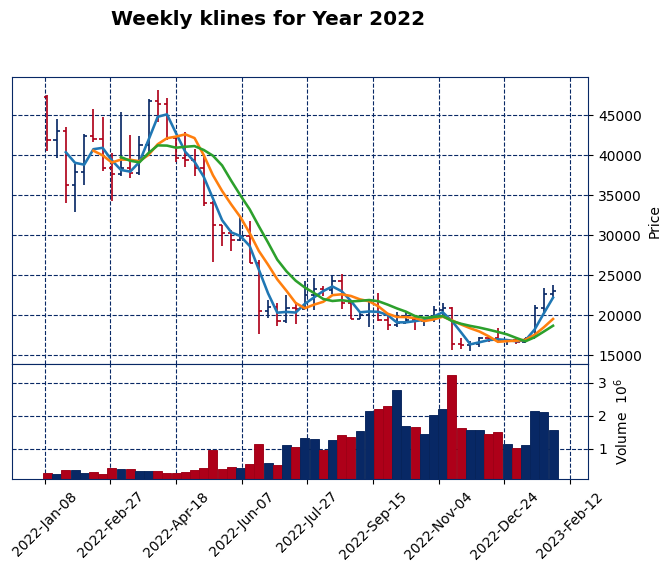

In [356]:
# 1 week  klines for weekly of 2022
mpf.plot(weekly_2022_klines_df.set_index('Close Time'),
        type = 'ohlc',
         style = 'starsandstripes',
         title = 'Weekly klines for Year 2022',
         volume=True,
         mav=(3,6,9),
         show_nontrading=True
        )